In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
movies = pd.read_csv('data\movies.csv')
crew = pd.read_csv('data\crew.csv')
directors = crew[crew['role'] == 'Director']
print(directors)

              id      role                  name
0        1000001  Director          Greta Gerwig
162      1000002  Director          Bong Joon-ho
243      1000003  Director           Daniel Kwan
244      1000003  Director      Daniel Scheinert
322      1000004  Director         David Fincher
...          ...       ...                   ...
4393596  1896376  Director  Jasmin Astaki-Bardeh
4393602  1896377  Director          Denis Pavlov
4393605  1896379  Director        Сергей Гордеев
4393608  1896382  Director         Alik Asatryan
4393610  1896387  Director          Loren Waters

[851617 rows x 3 columns]


In [4]:
movies_directors = pd.merge(movies, directors, on='id', how='inner',suffixes=('_m', '_d'))
movies_directors_filtered = movies_directors.dropna(subset=['rating'])

relacion_directors_promedio = movies_directors_filtered.groupby('name_d').agg({'rating': 'mean', 'id': 'count'})
relacion_directors_promedio = relacion_directors_promedio.rename(columns={'id': 'cantidad_peliculas'})


In [5]:
relacion_directors_promedio_ordRating = relacion_directors_promedio.sort_values(by='rating',ascending=False)

top_30_directors = relacion_directors_promedio.head(30)

relacion_directors_promedio.describe()

,rating,cantidad_peliculas
count,37674.000000,37674.000000
mean,3.243469,2.609837
std,0.376771,4.391149
min,1.090000,1.000000
25%,3.025000,1.000000
50%,3.300000,1.000000
75%,3.496859,3.000000
max,4.650000,201.000000


In [6]:
# Ordenar primero por la cantidad de películas y luego por el promedio del rating
relacion_directors_promedio = relacion_directors_promedio.sort_values(by=['cantidad_peliculas', 'rating'], ascending=False)

print(relacion_directors_promedio.head(30))

                        rating  cantidad_peliculas
name_d                                            
Chuck Jones           3.488955                 201
Friz Freleng          3.377365                 167
Georges Méliès        3.210120                 166
William Hanna         3.484355                 124
Joseph Barbera        3.484797                 123
Jean-Luc Godard       3.536263                  99
Tex Avery             3.433542                  96
Louis Lumière         3.145765                  85
Dave Fleischer        3.433095                  84
Stan Brakhage         3.495783                  83
Jesús Franco          3.045641                  78
John Ford             3.498143                  70
Takashi Miike         3.340857                  70
Charlie Chaplin       3.362647                  68
Robert McKimson       3.390000                  67
Michael Curtiz        3.365821                  67
Werner Herzog         3.572576                  66
David Lynch           3.340000 

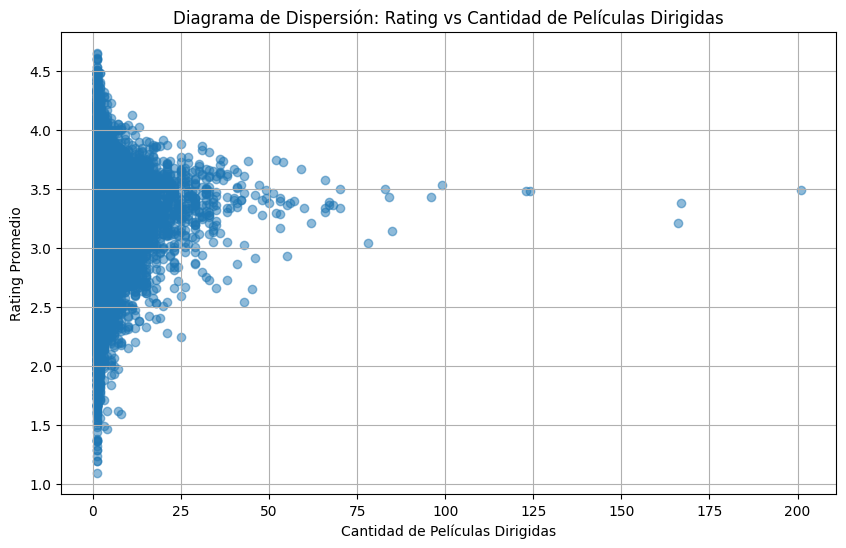

In [7]:
# Suponiendo que tienes la tabla relacion_actorT_promedio_ranking_peliculasmasque2
# relacion_actorT_promedio_ranking_peliculasmasque2 es el DataFrame que contiene las columnas name_z, rating y cantidad_peliculas

# Graficar el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(relacion_directors_promedio['cantidad_peliculas'], relacion_directors_promedio['rating'], alpha=0.5)
plt.title('Diagrama de Dispersión: Rating vs Cantidad de Películas Dirigidas')
plt.xlabel('Cantidad de Películas Dirigidas')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.show()